---
# ***Importing the Data***




In [2]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/music30s_trainin.csv
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/music30s_trainlabel.csv

--2022-04-24 17:22:02--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/music30s_trainin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 961560 (939K) [text/plain]
Saving to: ‘music30s_trainin.csv’

music30s_trainin.cs 100%[===================>] 939.02K  --.-KB/s    in 0.05s   

2022-04-24 17:22:03 (20.3 MB/s) - ‘music30s_trainin.csv’ saved [961560/961560]

--2022-04-24 17:22:03--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/music30s_trainlabel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connec

---
# ***Importing Relevant Libraries***

In [3]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score,StratifiedKFold
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle

---
# ***Pre-Processing the Data***

In [5]:
#Extracting Data

x_data = pd.read_csv("music30s_trainin.csv")
y_data = pd.read_csv("music30s_trainlabel.csv")

In [6]:
#Deleting the Top Row

del x_data["Unnamed: 0"]

Text(0.5, 1.0, 'Scatter Plots for various features')

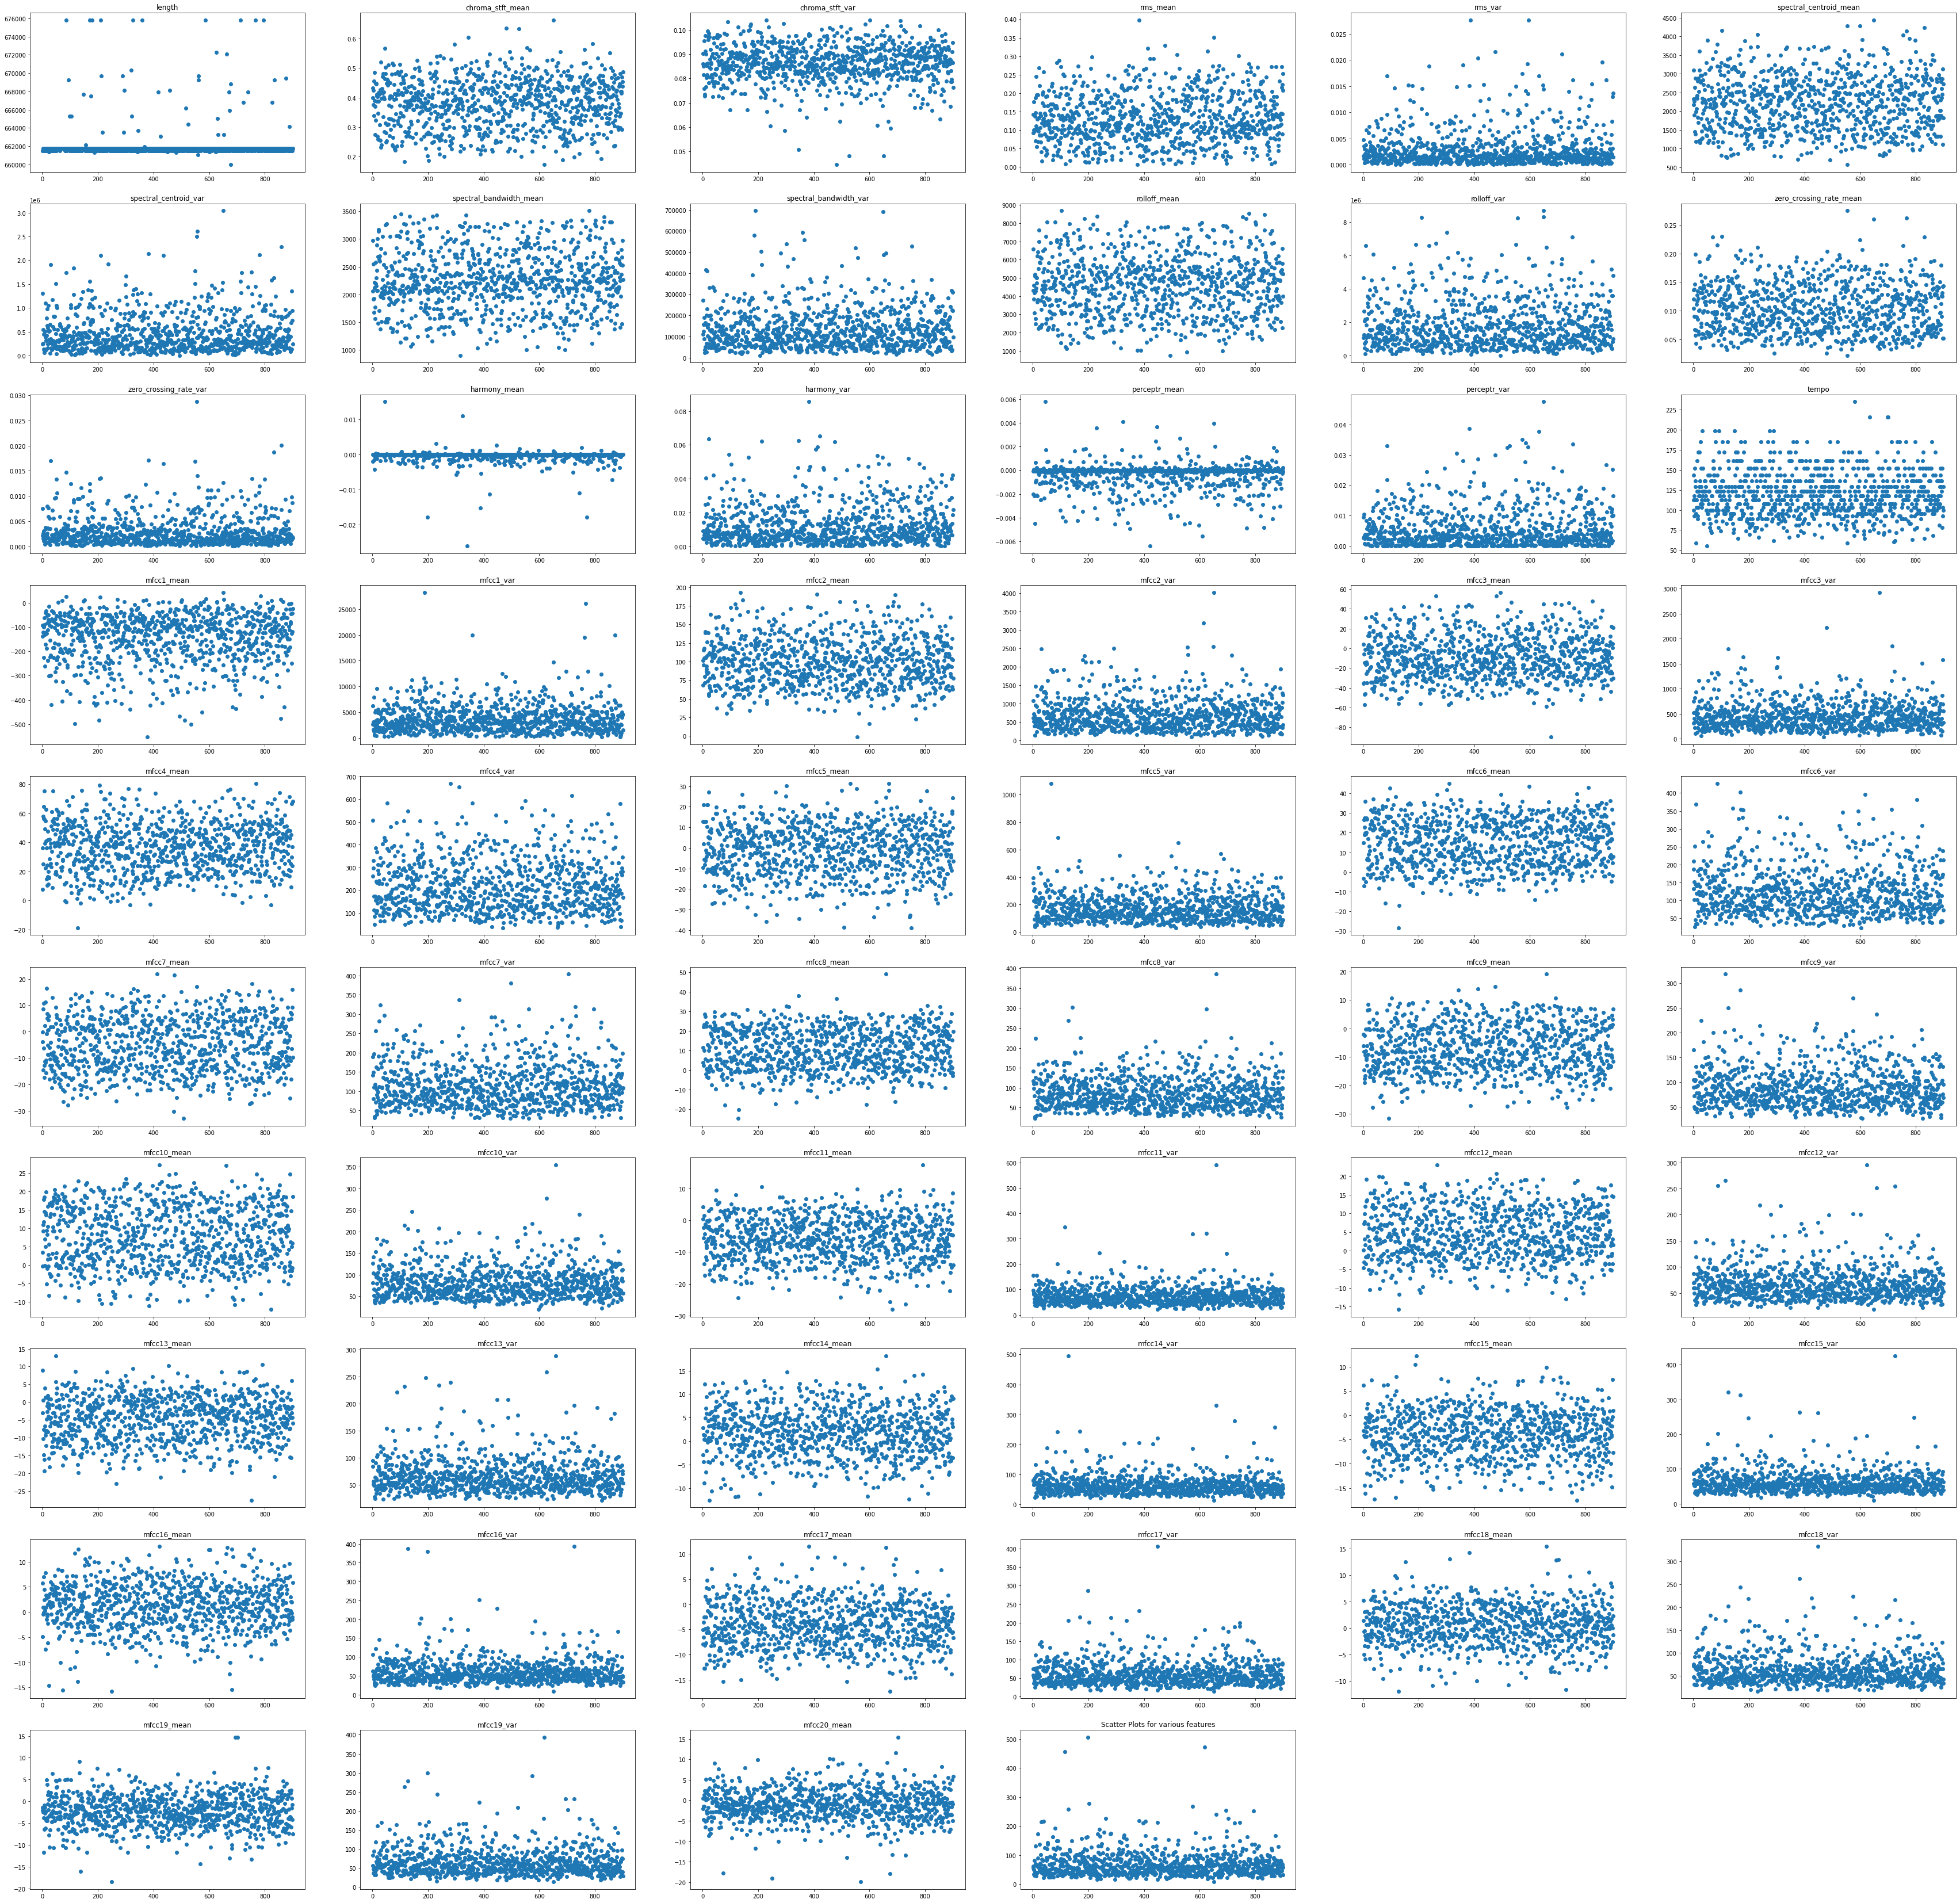

In [7]:
#Scatter Plot of the Features

plt.figure(figsize=(60,60))

j = 1 
for i in x_data.columns:                                            #Loop Over all Columns
  plt.subplot(10, 6, j)
  plt.scatter([i+1 for i in range(len(x_data[[i]]))], x_data[[i]])  #Scatter Plot
  plt.title(i)
  j+= 1

plt.title("Scatter Plots for various features")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

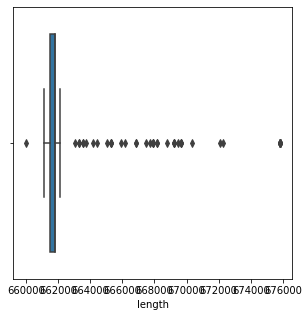

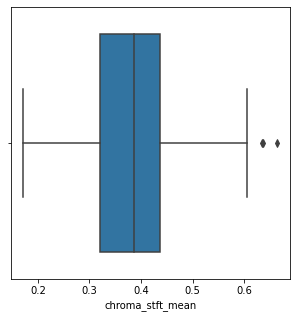

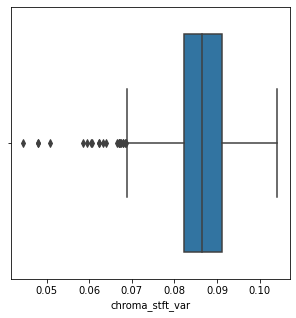

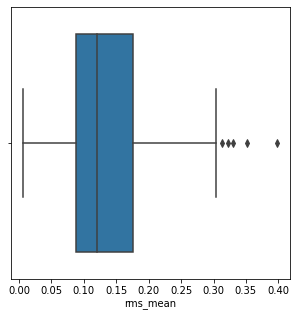

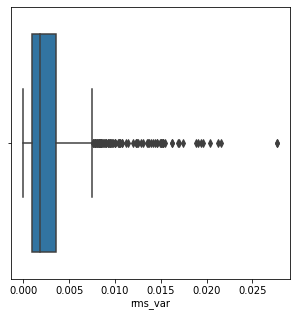

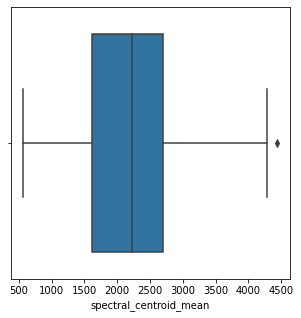

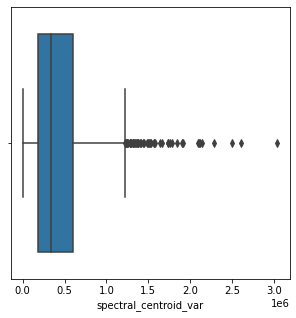

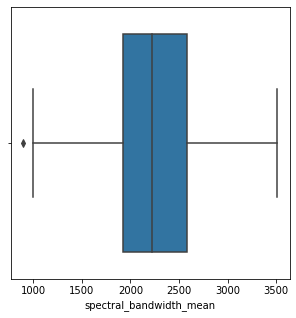

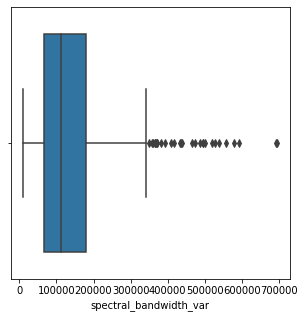

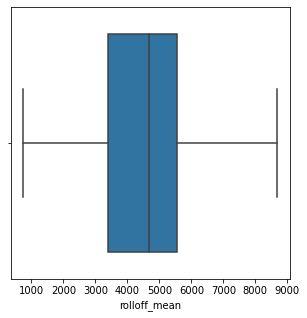

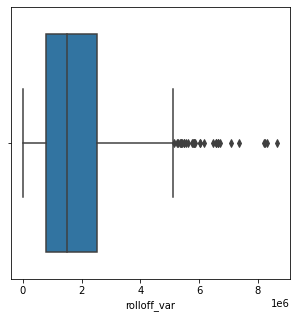

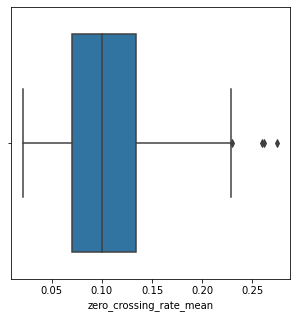

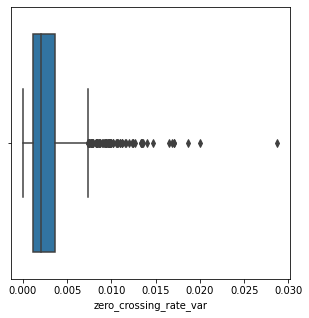

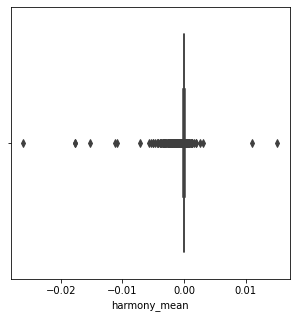

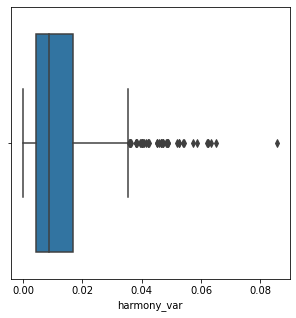

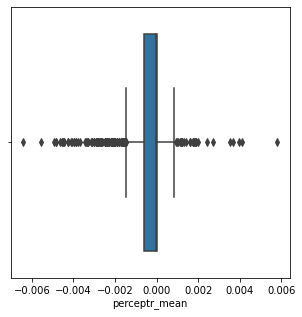

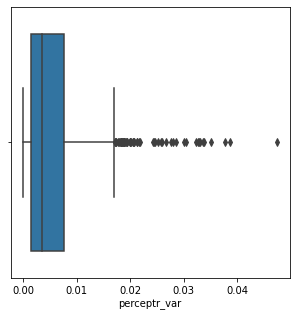

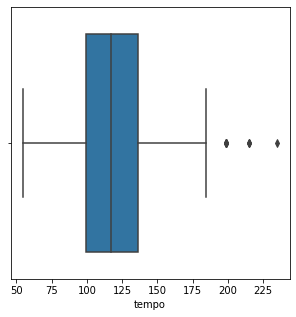

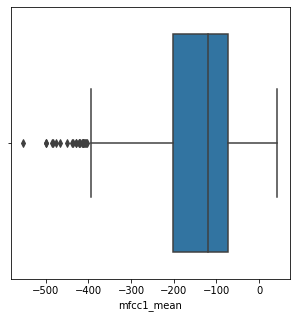

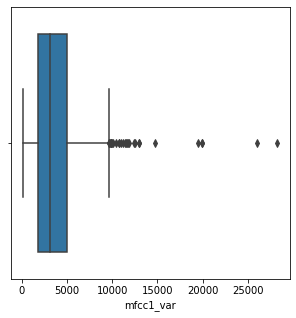

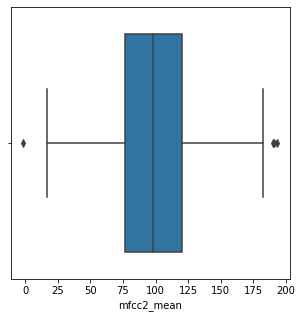

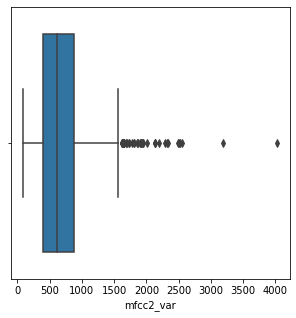

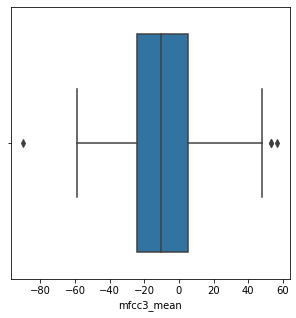

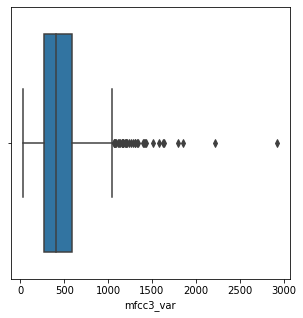

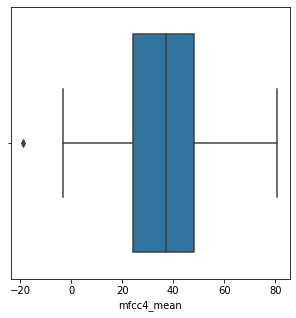

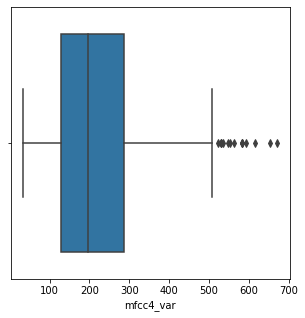

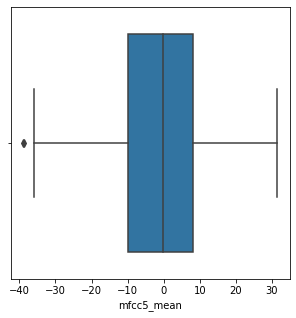

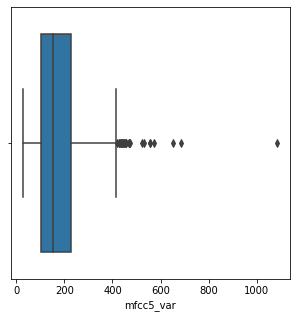

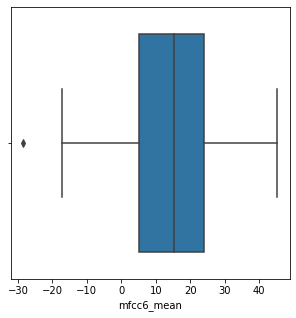

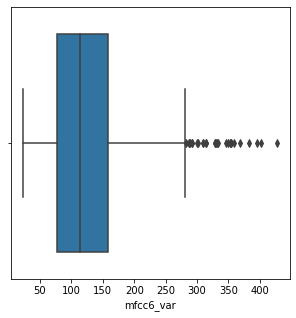

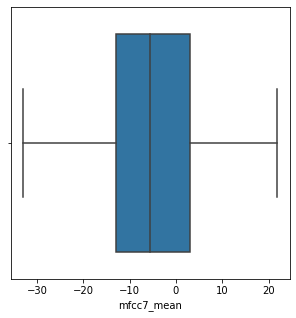

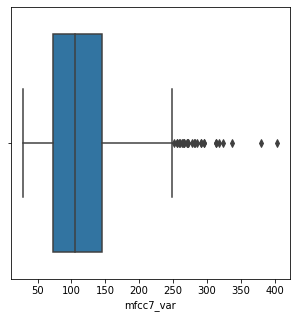

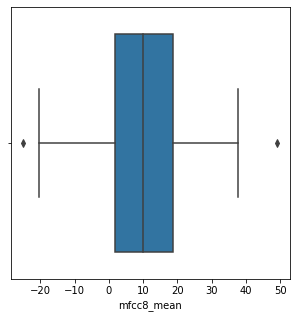

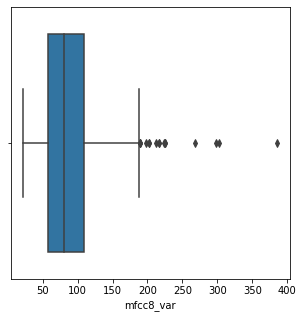

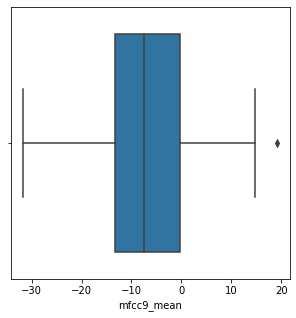

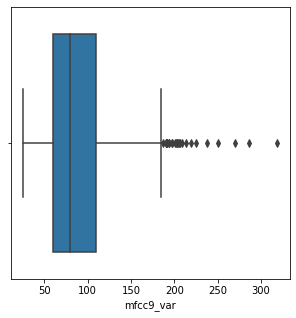

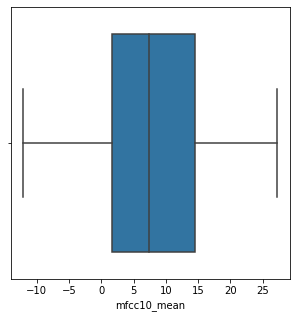

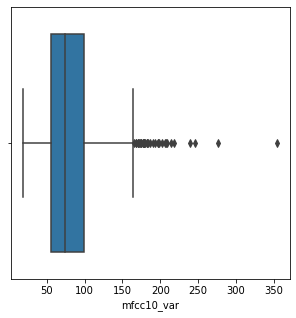

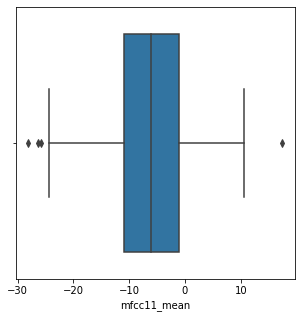

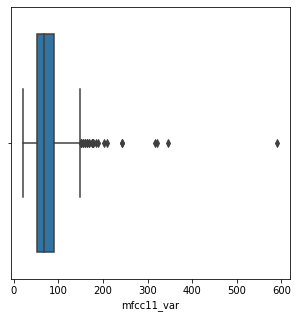

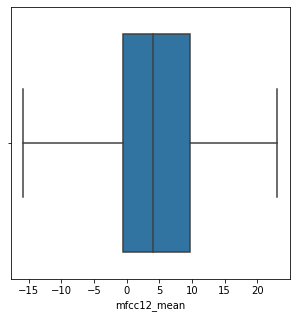

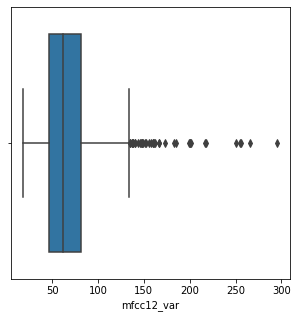

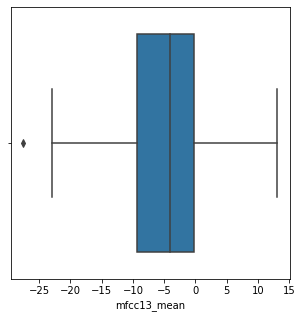

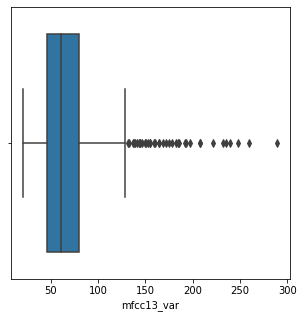

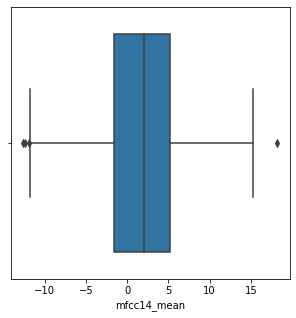

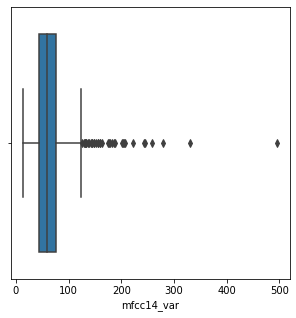

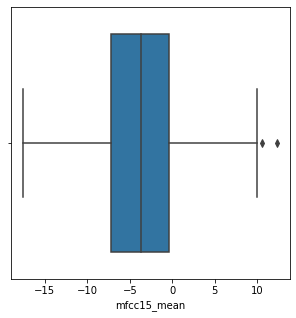

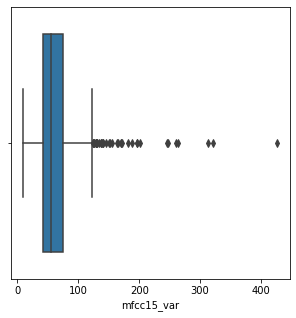

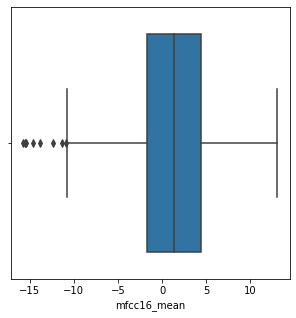

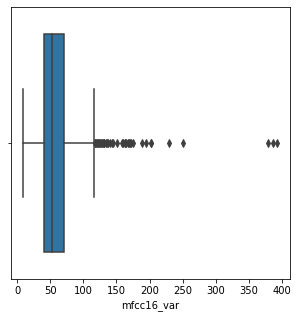

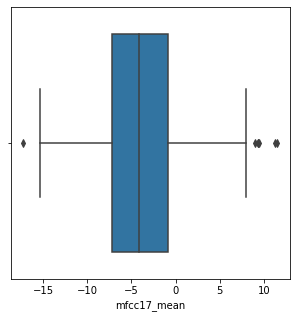

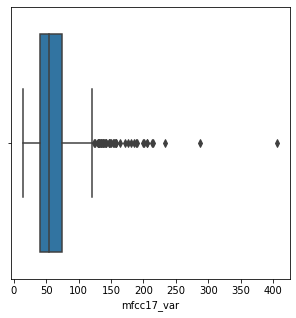

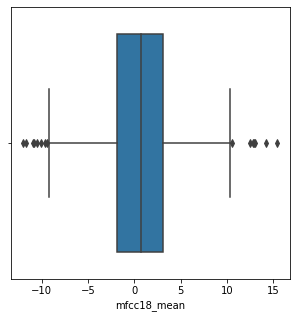

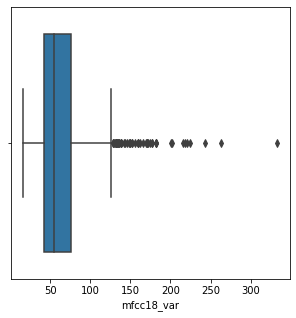

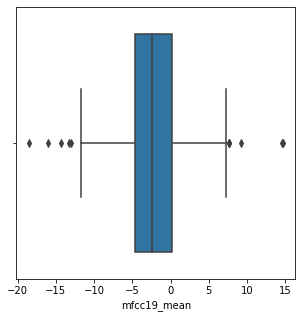

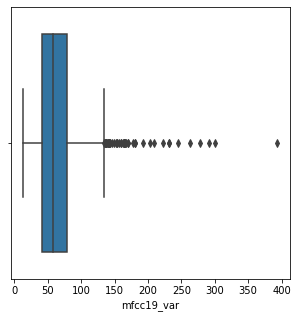

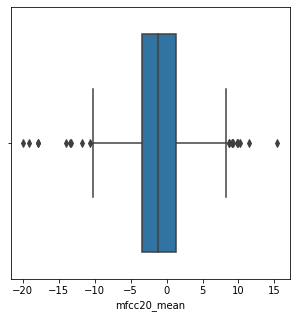

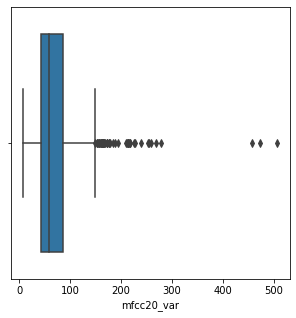

In [8]:
#Box Plots of Data

for c in x_data:                      
  plt.figure(figsize = (5, 5))  
  sns.boxplot(data = x_data, x = c)    #Plotting Box Plots

plt.show()

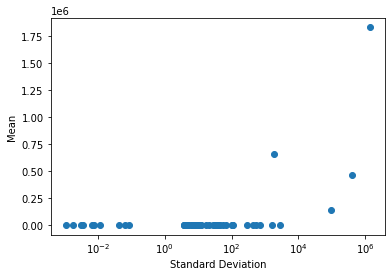

In [9]:
# ?

plt.scatter(x_data.describe().transpose()[["std"]], x_data.describe().transpose()[["mean"]])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Standard Deviation")
plt.ylabel("Mean")
plt.show()

In [10]:
 #Converting the DataFrame into an Array
 
 x_data_array = np.array(x_data)
 y_data_array = np.array(y_data["label"])

In [11]:
#Performing Principle Component Analysis for Dimensionality Reduction

pca = PCA(n_components = 2)                   #Assume 2 Components
x_data_2d = pca.fit_transform(x_data_array)   #Transformed Data

In [12]:
#Encoding the Different Genres as Colors

classes = np.unique(y_data_array)
colors = ["red", "blue", "green", "orange", "pink", "yellow", "black", "violet", "lightblue", "lightgreen"]

dict_classes_to_color = {}

for i in range(10):
  dict_classes_to_color[classes[i]] = colors[i]

dict_classes_to_color

{'blues': 'red',
 'classical': 'blue',
 'country': 'green',
 'disco': 'orange',
 'hiphop': 'pink',
 'jazz': 'yellow',
 'metal': 'black',
 'pop': 'violet',
 'reggae': 'lightblue',
 'rock': 'lightgreen'}

In [13]:
#Dictionary of Output Values according to their color

labels=[]

for i in y_data_array:
  labels.append(dict_classes_to_color[i])

Text(0, 0.5, 'Feature 2')

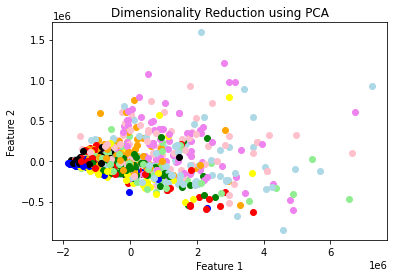

In [14]:
#Scatter Plot of the Output Data with Reduced Dimensions (using PCA)

for i in range(len(x_data_array)):
  plt.scatter(x_data_2d[i, 0], x_data_2d[i, 1], c = labels[i], label = y_data_array[i])   #Color Encoded

plt.title("Dimensionality Reduction using PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [15]:
#Performing LDA for Dimensionality Reduction

lda = LinearDiscriminantAnalysis(n_components = 2)                    #Assume 2 Components
X_r2 = lda.fit(x_data_array, y_data_array).transform(x_data_array)    #Transformed Data

Text(0, 0.5, 'Feature 2')

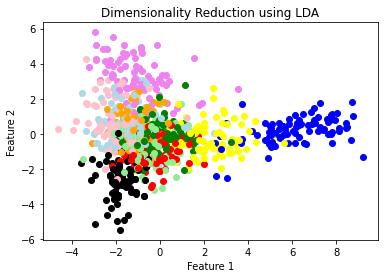

In [16]:
#Scatter Plot of the Output Data with Reduced Dimensions (using LDA)

for i in range(len(x_data_array)):
  plt.scatter(X_r2[i,0], X_r2[i,1], c = labels[i], label = y_data_array[i])

#plt.legend()
plt.title("Dimensionality Reduction using LDA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [17]:
x_data_array.shape

(900, 58)

In [18]:
pca = PCA(n_components = 20)
pca_out = pca.fit_transform(x_data_array)
x_data_array1 = StandardScaler().fit_transform(pca_out)


lda = LinearDiscriminantAnalysis(n_components = 9)
lda_out = lda.fit_transform(x_data_array, y_data_array)
x_data_array2 = StandardScaler().fit_transform(lda_out)

In [ ]:
#x_data_scaled=MinMaxScaler().fit_transform(x_data_array)

In [ ]:
#x_data_scaled

In [ ]:
#x_data_scaled.shape

In [19]:
y_data_array = np.array(y_data["label"])

In [20]:
y_data_array[:10]

array(['reggae', 'reggae', 'country', 'blues', 'metal', 'blues', 'rock',
       'metal', 'blues', 'jazz'], dtype=object)

In [21]:
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [22]:
x_std_scale = StandardScaler().fit_transform(x_data)
x_max_min = MinMaxScaler().fit_transform(x_data)

---
# ***Random Forest Classifier with Standard Scaler()***

In [ ]:
clf = RandomForestClassifier(class_weight='balanced', max_depth=10)
clf_parameters = {
                    'clf__criterion':('gini', 'entropy'), 
                    'clf__max_features':('auto', 'sqrt', 'log2'),   
                    'clf__n_estimators':(30,50,100,200),
                    'clf__max_depth':(10,20),
                  
                    }

In [ ]:
pipeline = Pipeline([ ('clf', clf) ]) 

parameters={**clf_parameters} 
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
grid = GridSearchCV(pipeline, parameters, scoring = 'f1_micro', cv = cv)          
grid.fit(x_std_scale, y_data_array)     
clf = grid.best_estimator_ 

In [ ]:
x, y = x_std_scale, y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

nested_score = cross_val_score(clf, X = x, y = y, cv = outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.73      0.69      0.71        86
   classical       0.94      0.89      0.91        89
     country       0.68      0.69      0.69        91
       disco       0.79      0.81      0.80        89
      hiphop       0.86      0.73      0.79        91
        jazz       0.81      0.84      0.82        89
       metal       0.86      0.95      0.90        91
         pop       0.83      0.89      0.86        88
      reggae       0.72      0.81      0.76        91
        rock       0.67      0.60      0.63        95

    accuracy                           0.79       900
   macro avg       0.79      0.79      0.79       900
weighted avg       0.79      0.79      0.79       900



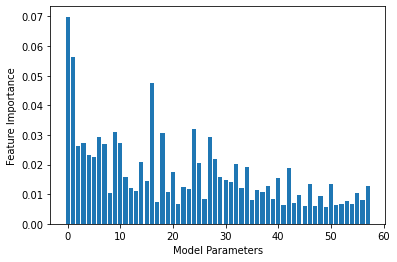

In [ ]:
importance = clf.steps[0][1].feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Model Parameters")
plt.ylabel("Feature Importance")
plt.show()

---
# ***Random Forest Classifier on PCA and LDA data***


In [ ]:
clf = RandomForestClassifier(class_weight='balanced', max_depth=10)
clf_parameters = {
                    'clf__criterion':('gini', 'entropy'), 
                    'clf__max_features':('auto', 'sqrt', 'log2'),   
                    'clf__n_estimators':(30,50,100,200),
                    'clf__max_depth':(10,20),
                    }

In [ ]:
pipeline = Pipeline([ ('clf', clf) ]) 

parameters={**clf_parameters} 
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
grid = GridSearchCV(pipeline, parameters, scoring = 'f1_micro', cv = cv)          
grid.fit(x_data_array2, y_data_array)     
clf = grid.best_estimator_

In [ ]:
clf.steps[0][1]

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200)

In [ ]:
x, y = x_data_array2, y_data_array
originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits=10, shuffle = True, random_state = 1)

nested_score = cross_val_score(clf, X = x, y = y, cv = outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.73      0.77      0.75        86
   classical       0.94      0.98      0.96        89
     country       0.80      0.77      0.78        91
       disco       0.65      0.69      0.67        89
      hiphop       0.80      0.69      0.74        91
        jazz       0.84      0.90      0.87        89
       metal       0.82      0.82      0.82        91
         pop       0.87      0.82      0.84        88
      reggae       0.73      0.76      0.75        91
        rock       0.59      0.57      0.58        95

    accuracy                           0.77       900
   macro avg       0.78      0.78      0.78       900
weighted avg       0.77      0.77      0.77       900



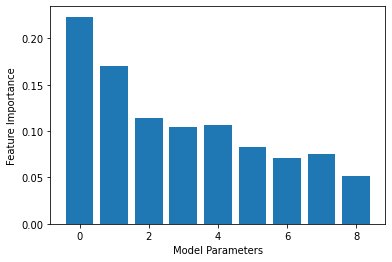

In [ ]:
importance = clf.steps[0][1].feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Model Parameters")
plt.ylabel("Feature Importance")
plt.show()

In [ ]:
filename = 'LDA_random_forest_classifier.sav'
pickle.dump(clf.steps[0][1], open(filename, 'wb'))

In [ ]:
clf = RandomForestClassifier(class_weight = 'balanced', max_depth = 10)
clf_parameters = {
                    'clf__criterion':('gini', 'entropy'), 
                    'clf__max_features':('auto', 'sqrt', 'log2'),   
                    'clf__n_estimators':(30,50,100,200),
                    'clf__max_depth':(10,20),
                    }

pipeline = Pipeline([
    ('clf', clf)]) 

parameters={**clf_parameters} 
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
grid = GridSearchCV(pipeline, parameters, scoring = 'f1_micro', cv = cv)          
grid.fit(x_max_min, y_data_array)     
clf = grid.best_estimator_ 


x, y = x_max_min, y_data_array

originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

nested_score = cross_val_score(clf, X = x, y = y, cv = outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.76      0.66      0.71        86
   classical       0.92      0.89      0.90        89
     country       0.68      0.74      0.71        91
       disco       0.82      0.82      0.82        89
      hiphop       0.87      0.76      0.81        91
        jazz       0.78      0.85      0.82        89
       metal       0.87      0.96      0.91        91
         pop       0.84      0.89      0.86        88
      reggae       0.72      0.78      0.75        91
        rock       0.68      0.61      0.64        95

    accuracy                           0.79       900
   macro avg       0.80      0.80      0.79       900
weighted avg       0.79      0.79      0.79       900



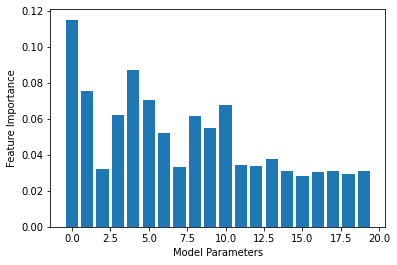

In [ ]:
importance = clf.steps[0][1].feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Model Parameters")
plt.ylabel("Feature Importance")
plt.show()

---
# ***Feature Selection - Correlation***

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y_data_array) + 1

In [ ]:
0 in encoded_labels

False

In [ ]:
x_data["labels"] = encoded_labels

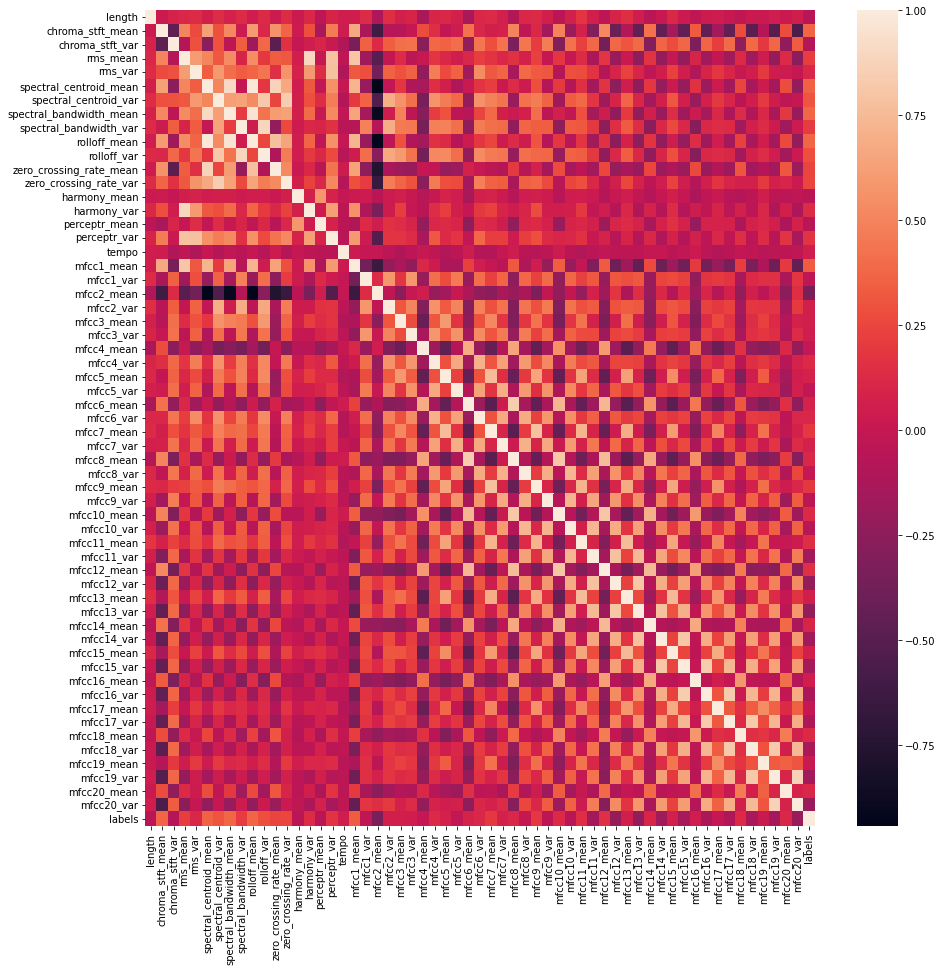

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(x_data.corr(), annot = False)
plt.show()

In [ ]:
corr = x_data.corr()

<BarContainer object of 59 artists>

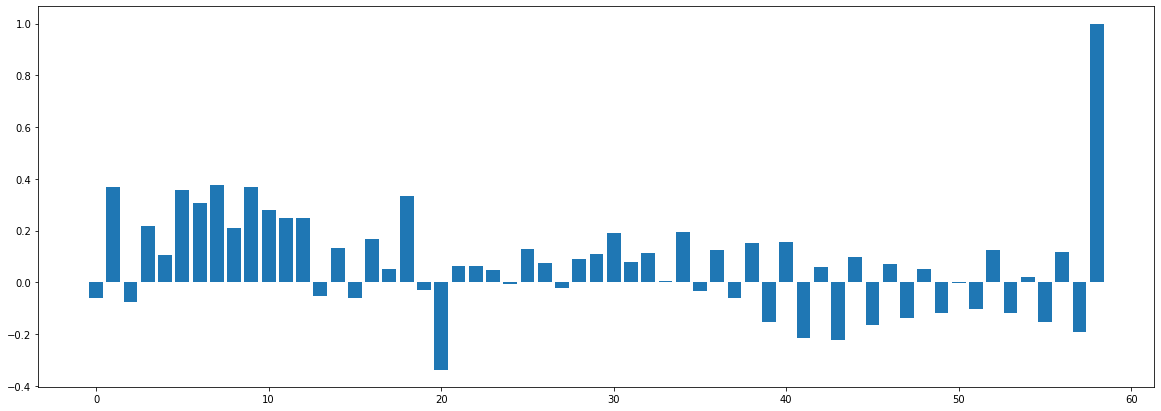

In [ ]:
plt.figure(figsize = (20,7))
plt.bar([i for i in range(len(np.array(corr["labels"])))], np.array(corr["labels"]))

In [ ]:
np.array(corr["labels"])

array([-0.05985732,  0.36656648, -0.07749224,  0.21581672,  0.10691545,
        0.35852714,  0.30645364,  0.3759302 ,  0.21098372,  0.36802507,
        0.2798913 ,  0.24870504,  0.25010319, -0.05310926,  0.13278629,
       -0.05911976,  0.16741126,  0.05300253,  0.33382534, -0.02993413,
       -0.33719097,  0.06167971,  0.06269347,  0.04765256, -0.00542293,
        0.12732434,  0.07543162, -0.02309672,  0.08886632,  0.10765476,
        0.1887455 ,  0.07835257,  0.11131655,  0.00613734,  0.19295285,
       -0.03216365,  0.12324147, -0.06150998,  0.1502564 , -0.1533735 ,
        0.15463437, -0.21577991,  0.05961028, -0.22429068,  0.09807099,
       -0.16556612,  0.07106255, -0.13970299,  0.05106159, -0.117574  ,
       -0.00276266, -0.1038191 ,  0.12415053, -0.11775665,  0.01906036,
       -0.1530901 ,  0.11748696, -0.19205342,  1.        ])

In [ ]:
ind = np.argpartition(np.abs(np.array(corr["labels"])), -20)[-21:-1]

In [ ]:
ind

array([40, 45, 16, 41, 30, 43,  3, 12,  8, 34, 57, 11, 10,  5,  6,  7,  9,
       20,  1, 18])

In [ ]:
x_data_array[:,ind].shape

(900, 20)

In [ ]:
k_best = x_data_array[:,ind]
X_selected = MinMaxScaler().fit_transform(k_best)

In [ ]:
clf = RandomForestClassifier(class_weight = 'balanced', max_depth = 10)
clf_parameters = {
                    'clf__criterion':('gini', 'entropy'), 
                    'clf__max_features':('auto', 'sqrt', 'log2'),   
                    'clf__n_estimators':(30,50,100,200),
                    'clf__max_depth':(10,20),
                    }

pipeline = Pipeline([
    ('clf', clf)]) 

parameters={**clf_parameters} 
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
grid = GridSearchCV(pipeline, parameters, scoring = 'f1_micro',cv = cv)          
grid.fit(X_selected, y_data_array)     
clf= grid.best_estimator_ 


x, y = X_selected, y_data_array

originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

nested_score = cross_val_score(clf, X = x, y = y, cv = outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.68      0.64      0.66        86
   classical       0.88      0.87      0.87        89
     country       0.58      0.56      0.57        91
       disco       0.52      0.56      0.54        89
      hiphop       0.67      0.56      0.61        91
        jazz       0.64      0.70      0.67        89
       metal       0.75      0.84      0.79        91
         pop       0.75      0.70      0.73        88
      reggae       0.59      0.66      0.62        91
        rock       0.51      0.46      0.48        95

    accuracy                           0.65       900
   macro avg       0.66      0.65      0.65       900
weighted avg       0.65      0.65      0.65       900



---
# ***Feature Selection - ANOVA F-value between label/feature for classification***

In [23]:
fs = SelectKBest(score_func = f_classif, k = 30)
X_selected = fs.fit_transform(x_data_array, y_data_array)

In [24]:
print(X_selected.shape)

(900, 30)


In [25]:
X_selected = StandardScaler().fit_transform(X_selected)

In [26]:
clf = RandomForestClassifier(class_weight = 'balanced', max_depth = 10)
clf_parameters = {
                    'clf__criterion':('gini', 'entropy'), 
                    'clf__max_features':('auto', 'sqrt', 'log2'),   
                    'clf__n_estimators':(30,50,100,200),
                    'clf__max_depth':(10,20),
                    }

pipeline = Pipeline([
    ('clf', clf)]) 

parameters={**clf_parameters} 
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
grid = GridSearchCV(pipeline, parameters, scoring = 'f1_micro', cv = cv)          
grid.fit(X_selected, y_data_array)     
clf= grid.best_estimator_ 


x, y = X_selected, y_data_array

originalclass = []
predictedclass = []

outer_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

nested_score = cross_val_score(clf, X = x, y = y, cv = outer_cv, scoring = make_scorer(classification_report_with_accuracy_score))

print(classification_report(originalclass, predictedclass))

              precision    recall  f1-score   support

       blues       0.73      0.71      0.72        86
   classical       0.88      0.93      0.91        89
     country       0.64      0.64      0.64        91
       disco       0.57      0.56      0.56        89
      hiphop       0.65      0.60      0.62        91
        jazz       0.76      0.76      0.76        89
       metal       0.81      0.90      0.85        91
         pop       0.78      0.74      0.76        88
      reggae       0.62      0.66      0.64        91
        rock       0.50      0.47      0.49        95

    accuracy                           0.70       900
   macro avg       0.70      0.70      0.70       900
weighted avg       0.69      0.70      0.69       900

